In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rupeshkent","key":"af7e1465a23f3935e20c1a7224d18894"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

 98% 797M/812M [00:07<00:00, 228MB/s]
100% 812M/812M [00:07<00:00, 114MB/s]


In [4]:
#Extracting the data from the Zip file

!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

In [8]:
#Creating Directories and subsets for Training, Validation and Test datasets

import os
import shutil
import pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        try:
            os.makedirs(dir)
        except FileExistsError:
            pass
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)


In [9]:
from tensorflow.keras.utils import image_dataset_from_directory

train = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation= image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test= image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [11]:
#Setting up a TensorFlow dataset from a NumPy array
#This can be used as an input for tensor flow data for Tensorflow Models

import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
data = tf.data.Dataset.from_tensor_slices(random_numbers)

# Creating the dataset
for i, element in enumerate(data):
    print(element.shape)
    if i >= 2:
        break

# Batching the dataset
batch = data.batch(32)
for i, element in enumerate(batch):
    print(element.shape)
    if i >= 2:
        break

# Reshaping the dataset
reshape = data.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshape):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)
(32, 16)
(32, 16)
(32, 16)
(4, 4)
(4, 4)
(4, 4)


In [12]:
#Displaying the shapes of databatches and label batches

for data_batch, labels_batch in train:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [14]:
#Representing a small Convnet for Dogs Vs cats classification

from tensorflow import keras
from tensorflow.keras import layers

input1 = keras.Input(shape=(180, 180, 3))
a = layers.Rescaling(1./255)(input1)
a = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(a)
a = layers.Flatten()(a)
a = layers.Dropout(0.5)(a)
output1 = layers.Dense(1, activation="sigmoid")(a)
model1 = keras.Model(inputs=input1, outputs=output1)

model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [15]:
#Configuring the model for training using Binary-crossentropy

model1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [17]:
#Fitting the model using the dataset

callback1 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history1 = model1.fit(
    train,
    epochs=10,
    validation_data=validation,
    callbacks=callback1)

Epoch 1/10
63/63 [==============================] - 4s 65ms/step - loss: 0.6838 - accuracy: 0.5505 - val_loss: 0.6804 - val_accuracy: 0.5470
Epoch 2/10
63/63 [==============================] - 4s 58ms/step - loss: 0.6797 - accuracy: 0.5620 - val_loss: 0.6826 - val_accuracy: 0.5680
Epoch 3/10
63/63 [==============================] - 6s 84ms/step - loss: 0.6706 - accuracy: 0.5860 - val_loss: 0.6593 - val_accuracy: 0.5900
Epoch 4/10
63/63 [==============================] - 6s 80ms/step - loss: 0.6381 - accuracy: 0.6355 - val_loss: 0.6599 - val_accuracy: 0.6080
Epoch 5/10
63/63 [==============================] - 4s 61ms/step - loss: 0.6303 - accuracy: 0.6615 - val_loss: 0.6473 - val_accuracy: 0.6470
Epoch 6/10
63/63 [==============================] - 4s 64ms/step - loss: 0.5886 - accuracy: 0.6800 - val_loss: 0.6043 - val_accuracy: 0.6830
Epoch 7/10
63/63 [==============================] - 7s 110ms/step - loss: 0.5556 - accuracy: 0.7145 - val_loss: 0.5999 - val_accuracy: 0.7150
Epoch 8/10
6

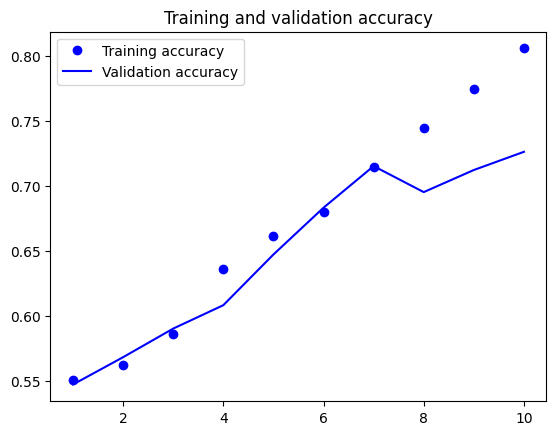

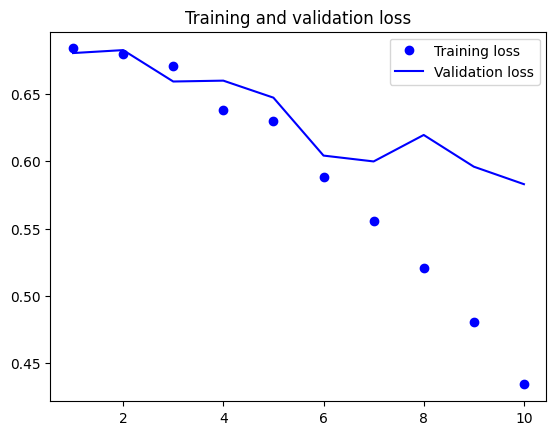

In [19]:
#Displaying the curves of Accuracy and loss during training

import matplotlib.pyplot as plt
accuracy = history1.history["accuracy"]
val_accuracy = history1.history["val_accuracy"]
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [20]:
#Evaluating the model on the Test dataset

testaccuracy_1 = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = testaccuracy_1.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.6302 - accuracy: 0.7140
Test accuracy: 0.714


2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

In [21]:
#Creating Directories and subsets for Training, Validation and Test datasets

import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)


#Creating training, Test and validation sets.
#Training has 1500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

In [22]:
#Define a data augmentation stage to add to an image model

Daugmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


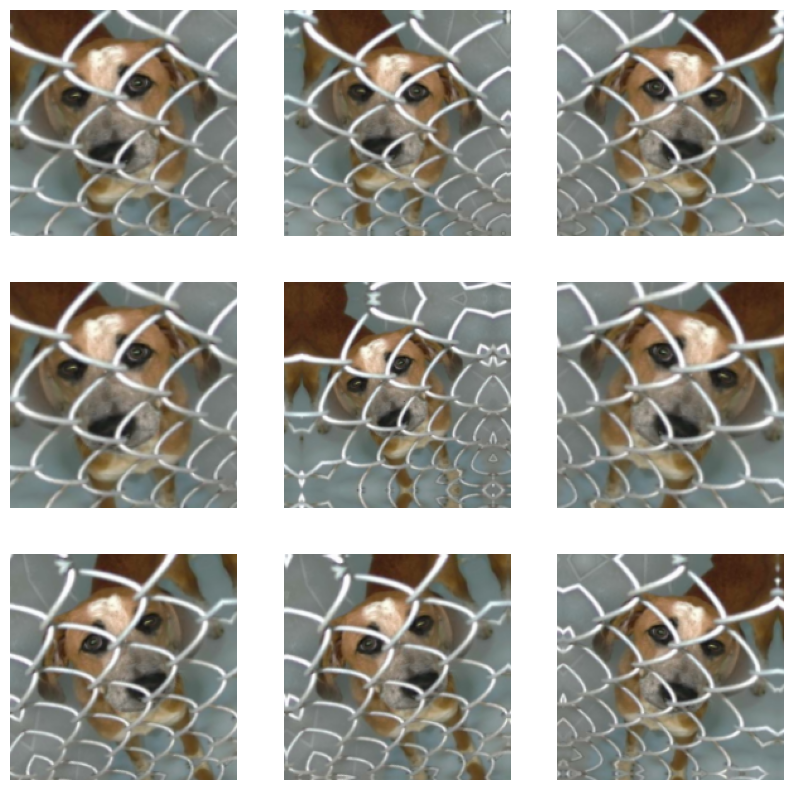

In [24]:
#Displaying some randomly augmented training images

plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
    for i in range(9):
        augmented_pics = Daugmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_pics[0].numpy().astype("uint8"))
        plt.axis("off")

In [25]:
#Defining a new convnet that includes image augmentation and dropout

inputs2 = keras.Input(shape=(180, 180, 3))
q = Daugmentation(inputs2)
q = layers.Rescaling(1./255)(q)
q = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(q)
q = layers.MaxPooling2D(pool_size=2)(q)
q = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(q)
q = layers.MaxPooling2D(pool_size=2)(q)
q = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(q)
q = layers.MaxPooling2D(pool_size=2)(q)
q = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(q)
q = layers.MaxPooling2D(pool_size=2)(q)
q = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(q)
q = layers.Flatten()(q)
q = layers.Dropout(0.5)(q)
outputs2 = layers.Dense(1, activation="sigmoid")(q)
model2 = keras.Model(inputs=inputs2, outputs=outputs2)


model2.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [26]:
#Training the Regularized Convnet

from keras.callbacks import ModelCheckpoint, EarlyStopping
callback2 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history2 = model2.fit(
    train,
    epochs=30,
    validation_data=validation,
    callbacks=callback2)

Epoch 1/30
63/63 [==============================] - 9s 106ms/step - loss: 0.6948 - accuracy: 0.5160 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 6s 80ms/step - loss: 0.7031 - accuracy: 0.5595 - val_loss: 0.7018 - val_accuracy: 0.5020
Epoch 3/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6865 - accuracy: 0.5965 - val_loss: 0.7314 - val_accuracy: 0.5040
Epoch 4/30
63/63 [==============================] - 6s 86ms/step - loss: 0.6621 - accuracy: 0.6045 - val_loss: 0.6550 - val_accuracy: 0.6160
Epoch 5/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6481 - accuracy: 0.6305 - val_loss: 0.7329 - val_accuracy: 0.5530
Epoch 6/30
63/63 [==============================] - 5s 70ms/step - loss: 0.6372 - accuracy: 0.6525 - val_loss: 0.6070 - val_accuracy: 0.6830
Epoch 7/30
63/63 [==============================] - 8s 116ms/step - loss: 0.6123 - accuracy: 0.6565 - val_loss: 0.6165 - val_accuracy: 0.6700
Epoch 8/30


In [61]:
#Evaluating the model on test dataset

testaccuracy_2 = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = testaccuracy_2.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.4571 - accuracy: 0.7900
Test accuracy: 0.790


3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

In [27]:
#Creating Directories and subsets for Training, Validation and Test datasets

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

#Training has 2000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [28]:
#Defining a new convnet with increased training samples that includes image augmentation and dropout

inputs3 = keras.Input(shape=(180, 180, 3))
r = Daugmentation(inputs3)
r = layers.Rescaling(1./255)(r)
r = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(r)
r = layers.MaxPooling2D(pool_size=2)(r)
r = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(r)
r = layers.MaxPooling2D(pool_size=2)(r)
r = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(r)
r = layers.MaxPooling2D(pool_size=2)(r)
r = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(r)
r = layers.MaxPooling2D(pool_size=2)(r)
r = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(r)
r = layers.Flatten()(r)
r = layers.Dropout(0.5)(r)
outputs3 = layers.Dense(1, activation="sigmoid")(r)
model3 = keras.Model(inputs=inputs3, outputs=outputs3)


model3.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [30]:
#Training the Regularized Convnet

callback3 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history3 = model3.fit(
    train,
    epochs=30,
    validation_data=validation,
    callbacks=callback3)


Epoch 1/30
63/63 [==============================] - 8s 84ms/step - loss: 0.6957 - accuracy: 0.4990 - val_loss: 0.6929 - val_accuracy: 0.5440
Epoch 2/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6936 - accuracy: 0.5290 - val_loss: 0.6881 - val_accuracy: 0.6060
Epoch 3/30
63/63 [==============================] - 5s 74ms/step - loss: 0.6933 - accuracy: 0.5505 - val_loss: 0.6573 - val_accuracy: 0.6240
Epoch 4/30
63/63 [==============================] - 6s 89ms/step - loss: 0.6671 - accuracy: 0.5980 - val_loss: 0.6512 - val_accuracy: 0.6150
Epoch 5/30
63/63 [==============================] - 7s 96ms/step - loss: 0.6389 - accuracy: 0.6295 - val_loss: 0.6316 - val_accuracy: 0.6240
Epoch 6/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6338 - accuracy: 0.6450 - val_loss: 0.6233 - val_accuracy: 0.6470
Epoch 7/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6255 - accuracy: 0.6470 - val_loss: 0.7081 - val_accuracy: 0.6020
Epoch 8/30
63

In [31]:
#Evaluating the model on test dataset

test_model3 = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model3.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.4571 - accuracy: 0.7900
Test accuracy: 0.790


4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.

In [33]:
#Instantiating the VGG16 convolutional base

convolution_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [34]:
convolution_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [35]:
#Extracting the VGG16 features and corresponding labels

import numpy as np

def get_features_and_labels(dataset):
    all_feature = []
    all_label = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = convolution_base.predict(preprocessed_images)
        all_feature.append(features)
        all_label.append(labels)
    return np.concatenate(all_feature), np.concatenate(all_label)

train_features, train_labels =  get_features_and_labels(train)
val_features, val_labels =  get_features_and_labels(validation)
test_features, test_labels =  get_features_and_labels(test)

1/1 [==============================] - 0s 28ms/step


In [36]:
train_features.shape

(2000, 5, 5, 512)

In [52]:
#Defining and training the densely connected classifier

i6 = keras.Input(shape=(5, 5, 512))
d = layers.Flatten()(i6)
d = layers.Dense(256)(d)
d = layers.Dropout(0.5)(d)
out6 = layers.Dense(1, activation="sigmoid")(d)
m6 = keras.Model(i6, out6)
m6.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [53]:
callback6 = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
hist6 = m6.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callback6)

Epoch 1/20
63/63 [==============================] - 2s 16ms/step - loss: 17.4168 - accuracy: 0.9225 - val_loss: 2.1924 - val_accuracy: 0.9770
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 2.8768 - accuracy: 0.9775 - val_loss: 3.8970 - val_accuracy: 0.9780
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.9181 - accuracy: 0.9870 - val_loss: 3.8227 - val_accuracy: 0.9680
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 2.3096 - accuracy: 0.9870 - val_loss: 3.5405 - val_accuracy: 0.9790
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.4426 - accuracy: 0.9905 - val_loss: 2.8870 - val_accuracy: 0.9780
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8247 - accuracy: 0.9935 - val_loss: 2.7076 - val_accuracy: 0.9820
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2067 - accuracy: 0.9990 - val_loss: 3.7159 - val_accuracy: 0.9770
Epoch 8/20
63/63 [

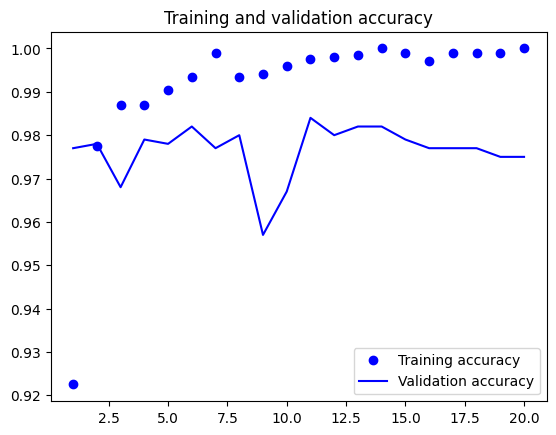

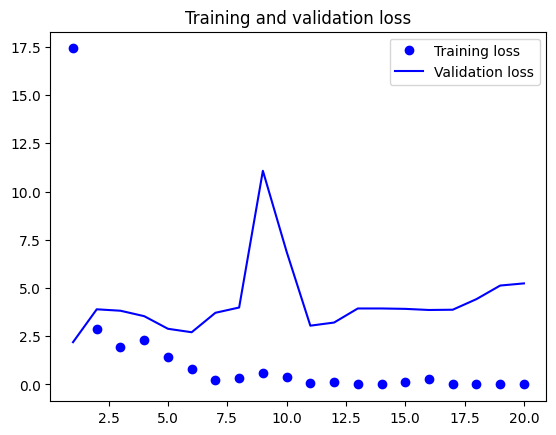

In [54]:
#Plotting the results

import matplotlib.pyplot as plt
accuracy6 = hist6.history["accuracy"]
valaccuracy6 = hist6.history["val_accuracy"]
los6 = hist6.history["loss"]
vallos6 = hist6.history["val_loss"]
epochs = range(1, len(accuracy6) + 1)
plt.plot(epochs, accuracy6, "bo", label="Training accuracy")
plt.plot(epochs, valaccuracy6, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, los6, "bo", label="Training loss")
plt.plot(epochs, vallos6, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [55]:
#Instantiating and freezing the VGG16 convolutional base

convolution_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
convolution_base.trainable = False

convolution_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(convolution_base.trainable_weights))

convolution_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(convolution_base.trainable_weights))


This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


In [46]:
#Adding a data augmentation stage and a classifier to the convolutional base

augmentation2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

input22 = keras.Input(shape=(180, 180, 3))
x1 = augmentation2(input22)
x1 =keras.layers.Lambda(
     lambda x: keras.applications.vgg16.preprocess_input(x))(x1)
x1 = convolution_base(x1)
x1 = layers.Flatten()(x1)
x1 = layers.Dense(256)(x1)
x1 = layers.Dropout(0.5)(x1)
outputs = layers.Dense(1, activation="sigmoid")(x1)
model = keras.Model(input22, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [56]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="features_extraction_with_augmentation2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train,
    epochs=10,
    validation_data=validation,
    callbacks=callbacks
)

Epoch 1/10
63/63 [==============================] - 20s 320ms/step - loss: 0.6930 - accuracy: 0.5150 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 20s 322ms/step - loss: 0.6935 - accuracy: 0.4915 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 21s 324ms/step - loss: 0.6935 - accuracy: 0.4840 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 23s 356ms/step - loss: 0.6933 - accuracy: 0.5030 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 21s 324ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 21s 320ms/step - loss: 0.6934 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
63/63 [==============================] - 21s 333ms/step - loss: 0.6934 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000

In [58]:
#Evaluating the model on the test set

test_model = keras.models.load_model(
    "features_extraction_with_augmentation2.keras",safe_mode=False)
test_loss, test_acc = test_model.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 89ms/step - loss: 0.6932 - accuracy: 0.5000
Test accuracy: 0.500


In [59]:
#Freezing all layers until the fourth from the last

convolution_base.trainable = True
for layer in convolution_base.layers[:-4]:
    layer.trainable = False

In [60]:
#Fine-Tuning the model

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbackstu = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
historytune = model.fit(
    train,
    epochs=30,
    validation_data=validation,
    callbacks=callbackstu)

Epoch 1/30
63/63 [==============================] - 24s 324ms/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 23s 362ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 21s 330ms/step - loss: 0.6934 - accuracy: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/30
63/63 [==============================] - 23s 366ms/step - loss: 0.6934 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/30
63/63 [==============================] - 21s 332ms/step - loss: 0.6928 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/30
63/63 [==============================] - 22s 343ms/step - loss: 0.6934 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/30
63/63 [==============================] - 21s 322ms/step - loss: 0.6928 - accuracy: 0.5045 - val_loss: 0.6932 - val_accuracy: 0.5000

In [62]:
model_tuning = keras.models.load_model("fine_tuning.keras",safe_mode=False)
test_loss, test_acc = model.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 85ms/step - loss: 0.6932 - accuracy: 0.5000
Test accuracy: 0.500
